# Import Data

In [73]:
import sys
print(sys.executable)
!{sys.executable} -m pip install xgboost

/opt/anaconda3/bin/python
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.5 MB/s eta 0:00:00a 0:00:01


In [180]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [182]:
df = pd.read_csv("insurance.csv")

In [184]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [187]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [189]:
# Compare charges amount for certian ages in certian regions from ACA to amount in here

# Northeast
ne = df[df['region'] == 'northeast']
pivot_ne = ne.pivot_table(index='age', columns=['sex', 'smoker', 'children'], values='charges', aggfunc='mean')
print(pivot_ne)

# From ACA - 25 y/o male non smoker 0 children (Philadelphia, PA) = 3149.76 minimum, Here is 2724.36 
# From ACA - 23 y/o female smoker with 2 children (Philadelphia, PA) = 6577.44 minimum (gets to 19728), Here is 38511.62 
# From ACA - 52 y/o female non smoker 1 child (Philadelphia, PA) =  6668.28 minimum (gets to 20184), Here is 10106.13 

sex             female                                                         \
smoker              no                                                          
children             0             1             2             3            4   
age                                                                             
18         4227.596881           NaN   3393.356350           NaN   4561.18850   
20         2458.465625           NaN           NaN           NaN          NaN   
21         2585.850650   3167.455850           NaN           NaN          NaN   
22         2742.960383           NaN   3925.758200           NaN          NaN   
23         2899.489350           NaN  22395.744240           NaN          NaN   
24         3045.137650           NaN           NaN           NaN          NaN   
25         8099.671360           NaN           NaN           NaN          NaN   
26         3385.399150           NaN   4564.191450           NaN  24671.66334   
27         3558.620250  1784

In [191]:
# Southeast
se = df[df['region'] == 'southeast']
pivot_se = se.pivot_table(index='age', columns=['sex', 'smoker', 'children'], values='charges', aggfunc='mean')
print(pivot_se)

# From ACA - 25 y/o male non smoker 0 children (Atlanta, GA) = 3649.92 minimum , Here is 2137.65
# From ACA - 23 y/o female smoker with 2 children (Atlanta, GA) = (12972.72-31258.2) , Here is 36021.01
# From ACA - 53 y/o female non smoker 1 child (Atlanta, GA) = 11216.20 minimum, Here is 10579.71

sex             female                                                       \
smoker              no                                                        
children             0             1            2            3            4   
age                                                                           
18         3489.826933   2210.271100   2801.25880          NaN          NaN   
19                 NaN           NaN          NaN          NaN          NaN   
20         1878.999700           NaN   3056.38810          NaN          NaN   
21         2023.763200           NaN   3180.51010          NaN          NaN   
22         2156.216650           NaN          NaN          NaN          NaN   
23                 NaN           NaN   3500.61230          NaN          NaN   
24         8125.174960           NaN          NaN          NaN          NaN   
25                 NaN   8227.906063          NaN          NaN          NaN   
26                 NaN   3392.671000   3981.97680   

In [193]:
# Southwest
sw = df[df['region'] == 'southwest']
pivot_sw = sw.pivot_table(index='age', columns=['sex', 'smoker', 'children'], values='charges', aggfunc='mean')
print(pivot_sw)

# From ACA - 26 y/o male non smoker 1 child (Phoenix, AZ) = (4824-14712) , Here 2904.96
# From ACA - 36 y/o female smoker with 2 children (Phoenix, AZ) = (8268-23460) , Here 18608.26
# From ACA - 51 y/o female non smoker 1 child (Phoenix, AZ) = (7716-21864), Here 9871.26

sex             female                                                     \
smoker              no                                                      
children             0             1            2          3            4   
age                                                                         
19         1740.190750   2331.519000   2913.56900        NaN          NaN   
20         1877.915500           NaN          NaN        NaN          NaN   
21         2014.061000   2591.524000          NaN        NaN          NaN   
22         2157.187333           NaN          NaN        NaN          NaN   
23        11961.307390           NaN          NaN        NaN          NaN   
24        10706.361085           NaN          NaN   4234.927          NaN   
25         2632.992000   3208.787000          NaN   4391.652          NaN   
26                 NaN   3394.617000   3987.92600        NaN          NaN   
27         2974.126000   3577.999000          NaN        NaN          NaN   

In [195]:
# Northwest
nw = df[df['region'] == 'northwest']
pivot_nw = nw.pivot_table(index='age', columns=['sex', 'smoker', 'children'], values='charges', aggfunc='mean')
print(pivot_nw)

# From ACA - 25 y/o male non smoker 0 children (Seattle, WA) = (2760-9972) , Here 2528.78
# From ACA - 32 y/o female smoker with 2 children (Seattle, WA) = (9624-32796) , Here 32734.19
# From ACA - 53 y/o female non smoker 1 child (Seattle, WA) = (8172-27840) , Here 10950.91

sex             female                                                        \
smoker              no                                                         
children             0             1             2             3           4   
age                                                                            
19         2131.050042   2715.714400  24059.680190  18838.703660         NaN   
20         2259.522025           NaN           NaN           NaN         NaN   
21         2404.733800           NaN  14799.389610           NaN         NaN   
22         2527.818650           NaN           NaN   4296.271200         NaN   
23         2690.113800           NaN  14426.073850   4466.621400         NaN   
24         2849.627350           NaN           NaN   4618.079900         NaN   
25         3021.809150   3594.170850   4189.113100           NaN         NaN   
26         3184.782917           NaN           NaN           NaN         NaN   
27         3353.470300   3956.071450    

In [197]:
# Show histograms, boxplots, scatterplots, count graphs, etc

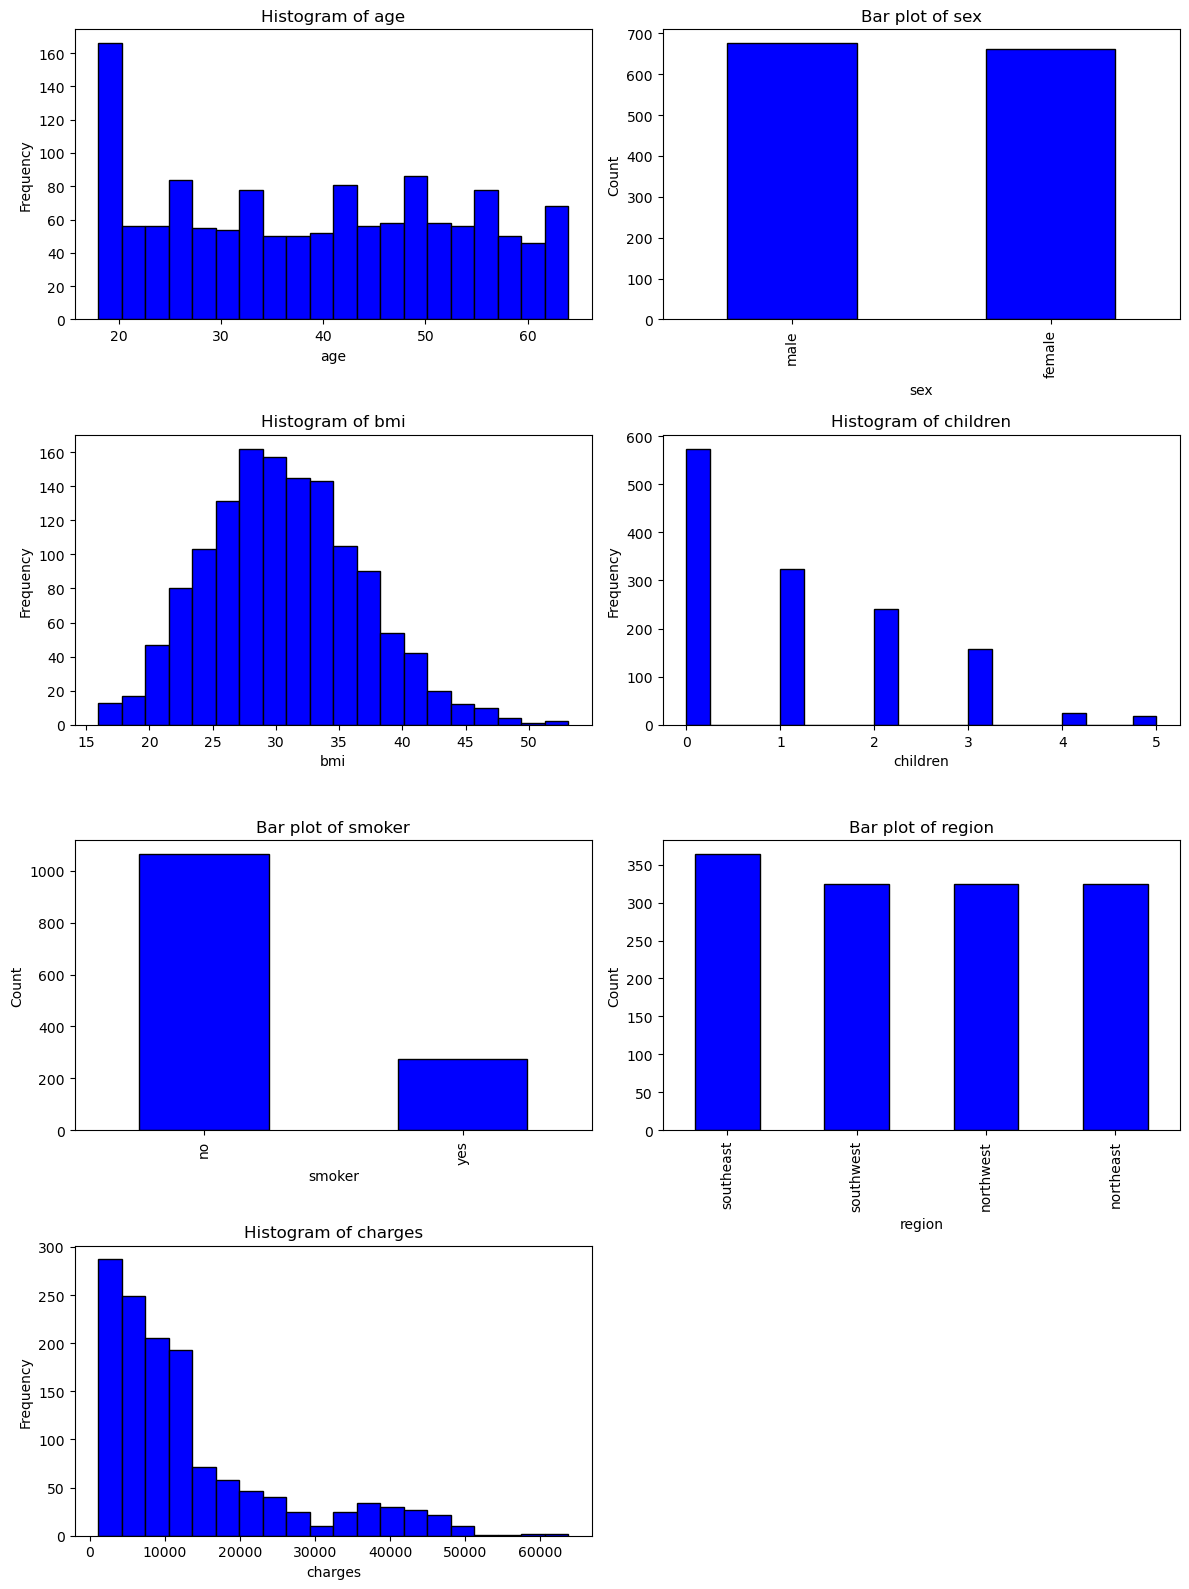

In [199]:
n_cols = len(df.columns)

n_cols_per_row = 2
n_rows = math.ceil(n_cols / n_cols_per_row)

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    if df[col].dtype in ['int64', 'float64']:
        ax.hist(df[col], bins=20, color='blue', edgecolor='black')
        ax.set_title(f"Histogram of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
    else:
        df[col].value_counts().plot(kind='bar', color='blue', edgecolor='black', ax=ax)
        ax.set_title(f"Bar plot of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


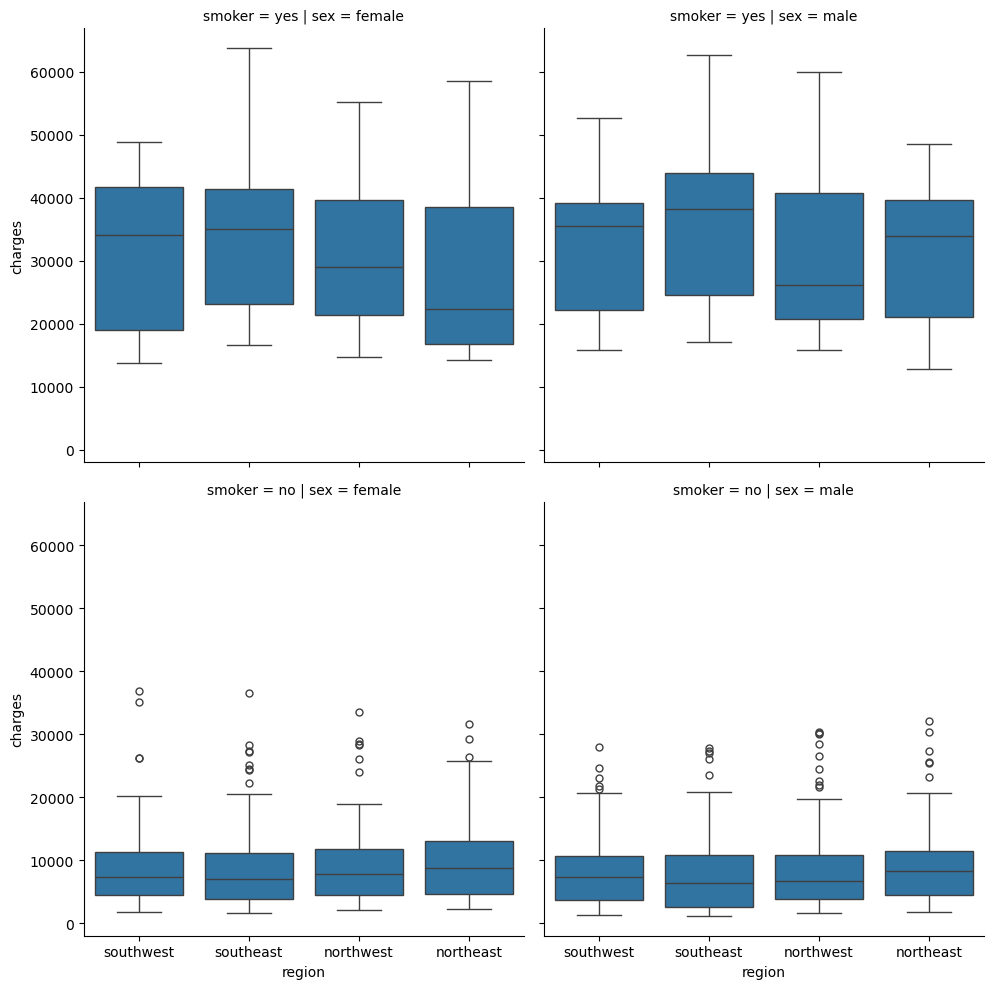

In [201]:
sns.catplot(x="region",y="charges",data=df,col="sex",row="smoker",kind="box")

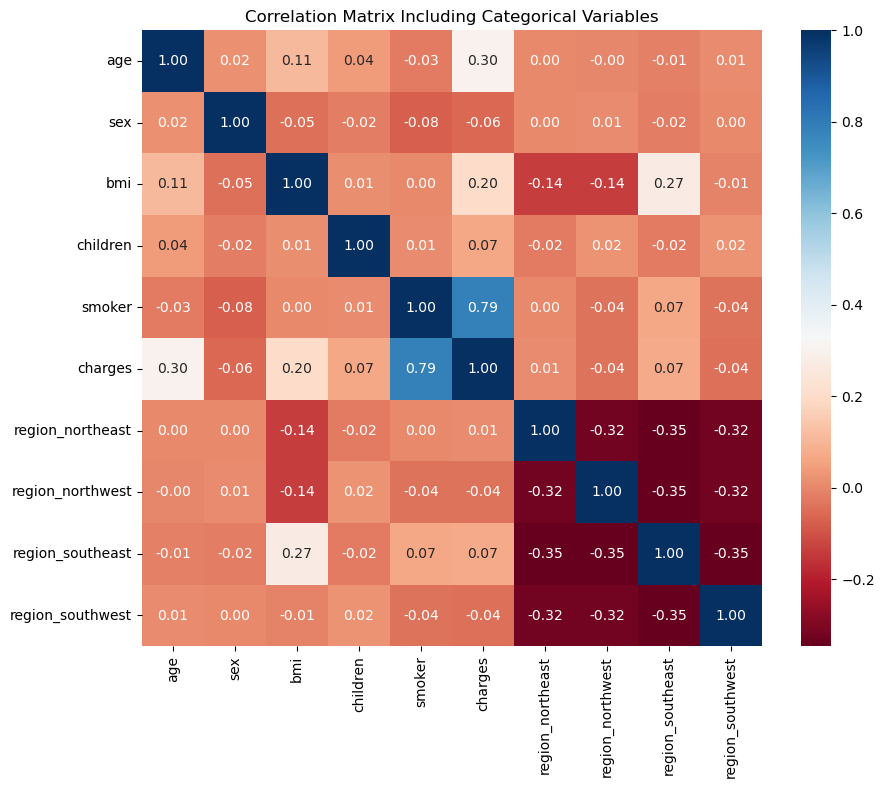

In [225]:
df_encoded = df.copy()

df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})
df_encoded['smoker'] = df_encoded['smoker'].map({'no': 0, 'yes': 1})

df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=False)

corr_matrix = df_encoded.corr()

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu", cbar=True)
plt.title("Correlation Matrix Including Categorical Variables")
plt.show()

# Get Data Into Proper Format

In [227]:
# Include wages for each region
# Source - https://apps.bea.gov/itable/?ReqID=70&step=1&_gl=1*1rtjg0g*_ga*MTI2MTUyNDM0MC4xNzYyMzc3MTcx*_ga_J4698JNNFT*czE3NjIzNzcxNzEkbzEkZzAkdDE3NjIzNzcxNzEkajYwJGwwJGgw#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMCwzMF0sImRhdGEiOltbIlRhYmxlSWQiLCIzNiJdLFsiTWFqb3JfQXJlYSIsIjAiXSxbIlN0YXRlIixbIjAiXV0sWyJBcmVhIixbIlhYIl1dLFsiU3RhdGlzdGljIiwiMyJdLFsiVW5pdF9vZl9tZWFzdXJlIiwiTGV2ZWxzIl0sWyJZZWFyIixbIjIwMjQiXV0sWyJZZWFyQmVnaW4iLCItMSJdLFsiWWVhcl9FbmQiLCItMSJdXX0=

df_wages = pd.read_csv("PerCapitaIncome.csv", skiprows=3)

df_wages['GeoName'] = df_wages['GeoName'].str.replace('*', '', regex=False).str.strip()

northeast = [
    "Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island",
    "Connecticut", "Delaware", "Maryland", "New Jersey", "New York",
    "Pennsylvania", "District of Columbia"
]

southeast = [
    "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia",
    "Florida", "Alabama", "Mississippi", "Tennessee", "Kentucky", "Arkansas", "Louisiana"
]

southwest = [
    "Texas", "Oklahoma", "New Mexico", "Arizona"
]

northwest = [
    "Washington", "Oregon", "Idaho", "Montana", "Wyoming", "Alaska"
]

def avg_region_income(region_states):
    region_df = df_wages[df_wages['GeoName'].isin(region_states)]
    region_df['avg_state_income'] = region_df[['2024:Q1', '2024:Q2', '2024:Q3', '2024:Q4']].mean(axis=1)
    return region_df['avg_state_income'].mean()

avg_incomes = {
    'northeast': avg_region_income(northeast),
    'southeast': avg_region_income(southeast),
    'southwest': avg_region_income(southwest),
    'northwest': avg_region_income(northwest)
}

region_income_df = pd.DataFrame(list(avg_incomes.items()), columns=['region', 'avg_region_wage'])

df_merged = df.merge(region_income_df, on='region', how='left')

print(df_merged)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      avg_region_wage  
0        64413.375000  
1        62554.687500  
2        62554.687500  
3        75063.583333  
4        75063.583333  
...            

/var/folders/ps/j95jq86d427bd7h10_wytb2m0000gn/T/ipykernel_55274/3007021741.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['avg_state_income'] = region_df[['2024:Q1', '2024:Q2', '2024:Q3', '2024:Q4']].mean(axis=1)
/var/folders/ps/j95jq86d427bd7h10_wytb2m0000gn/T/ipykernel_55274/3007021741.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['avg_state_income'] = region_df[['2024:Q1', '2024:Q2', '2024:Q3', '2024:Q4']].mean(axis=1)
/var/folders/ps/j95jq86d427bd7h10_wytb2m0000gn/T/ipy

In [229]:
sex_map = {"male":0, "female":1}
smoker_map = {"yes":1, "no":0}

df_merged['sex'] = df_merged['sex'].map(sex_map)
df_merged['smoker'] = df_merged['smoker'].map(smoker_map)

df_merged = pd.get_dummies(df_merged, columns=['region'], drop_first=False)

df_merged = df_merged[['age', 'sex', 'bmi', 'children', 'smoker',
                       'avg_region_wage', 'region_northeast',
                       'region_southeast', 'region_southwest', 'region_northwest', 
                       'charges']]

print(df_merged.head())

   age  sex     bmi  children  smoker  avg_region_wage  region_northeast  \
0   19    1  27.900         0       1     64413.375000             False   
1   18    0  33.770         1       0     62554.687500             False   
2   28    0  33.000         3       0     62554.687500             False   
3   33    0  22.705         0       0     75063.583333             False   
4   32    0  28.880         0       0     75063.583333             False   

   region_southeast  region_southwest  region_northwest      charges  
0             False              True             False  16884.92400  
1              True             False             False   1725.55230  
2              True             False             False   4449.46200  
3             False             False              True  21984.47061  
4             False             False              True   3866.85520  


# Modeling

In [232]:
# Get training and testing sets
X = df_merged.iloc[:, :-1]
Y = df_merged.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (1070, 10)
x_test: (268, 10)
y_train: (1070,)
y_test: (268,)


In [234]:
# Do PCA on X's
# Define numeric and categorical columns
numeric_cols = ['age', 'bmi', 'children', 'avg_region_wage']
categorical_cols = [col for col in x_train.columns if col not in numeric_cols]

# 1. Scale numeric columns
scaler = StandardScaler()
x_train_scaled_num = scaler.fit_transform(x_train[numeric_cols])
x_test_scaled_num = scaler.transform(x_test[numeric_cols])

# 2. Apply PCA on scaled numeric features
pca = PCA(n_components=0.95)  # Keep 95% of variance
x_train_pca = pca.fit_transform(x_train_scaled_num)
x_test_pca = pca.transform(x_test_scaled_num)

# 3. Keep categorical/binary columns as-is
x_train_cat = x_train[categorical_cols].values
x_test_cat = x_test[categorical_cols].values

# 4. Combine PCA numeric features with categorical columns
x_train_final = np.hstack([x_train_pca, x_train_cat])
x_test_final = np.hstack([x_test_pca, x_test_cat])

print("Number of PCA components:", x_train_pca.shape[1])
print("Train shape:", x_train_final.shape)
print("Test shape:", x_test_final.shape)

# Note that PCA only got rid of 1 variable - not worth it to do

Number of PCA components: 4
Train shape: (1070, 10)
Test shape: (268, 10)


In [236]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [238]:
# Linear Regression

lr = LinearRegression(fit_intercept=True).fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

lr_coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lr.coef_
})

print("\nIntercept:", lr.intercept_)
print("\nCoefficients:")
print(lr_coef_df)

print("MSE:", mean_squared_error(y_test, lr_y_pred))
print("RMSE:", root_mean_squared_error(y_test, lr_y_pred))
print("R²:", r2_score(y_test, lr_y_pred))

lr_cv_mse = -cross_val_score(lr, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)
lr_cv_rmse = np.sqrt(lr_cv_mse)
print("\nCV:")
print("Average MSE:", np.mean(lr_cv_mse))
print("Average RMSE:", np.mean(lr_cv_rmse))


Intercept: -15064.280802153045

Coefficients:
            Feature   Coefficient
0               age    256.975706
1               sex     18.591692
2               bmi    337.092552
3          children    425.278784
4            smoker  23651.128856
5   avg_region_wage      0.037402
6  region_northeast     51.224381
7  region_southeast    116.964457
8  region_southwest   -104.488365
9  region_northwest    -63.700473
MSE: 33596915.85136149
RMSE: 5796.284659276275
R²: 0.7835929767120722

CV:
Average MSE: 37737178.561508216
Average RMSE: 6123.353822736733


In [170]:
ridge = Ridge(fit_intercept=True, solver='auto', random_state=42)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf
)

ridge_grid.fit(x_train_scaled, y_train)

# Best alpha
best_alpha = ridge_grid.best_params_['alpha']
print("Best alpha:", best_alpha)

ridge_best = ridge_grid.best_estimator_

ridge_y_pred = ridge_best.predict(x_test_scaled)

ridge_coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': ridge_best.coef_
})

print("\n--- Test Set Metrics ---")
print("Intercept:", ridge_best.intercept_)
print("Coefficients:")
print(ridge_coef_df)
print("MSE:", mean_squared_error(y_test, ridge_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_y_pred)))
print("R²:", r2_score(y_test, ridge_y_pred))

ridge_cv_mse = -ridge_grid.best_score_ 
ridge_cv_rmse = np.sqrt(ridge_cv_mse)
print("\n--- Cross-Validation Performance (best alpha) ---")
print("CV MSE:", ridge_cv_mse)
print("CV RMSE:", ridge_cv_rmse)

Best alpha: 1

--- Test Set Metrics ---
Intercept: 13346.089736364485
Coefficients:
            Feature  Coefficient
0               age  3611.352713
1               sex     8.622261
2               bmi  2034.474641
3          children   516.763024
4            smoker  9549.273106
5   avg_region_wage   126.344386
6  region_northeast   123.642458
7  region_southeast   -27.549015
8  region_southwest  -105.879121
9  region_northwest    10.057227
MSE: 33604444.64172056
RMSE: 5796.934072569789
R²: 0.7835444816919407

--- Cross-Validation Performance (best alpha) ---
CV MSE: 37736990.59156649
CV RMSE: 6143.044081851154


In [172]:
lasso = Lasso(max_iter=10000, fit_intercept=True, random_state=42)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}  
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf
)

lasso_grid.fit(x_train_scaled, y_train)

best_alpha = lasso_grid.best_params_['alpha']
print("Best alpha:", best_alpha)

lasso_best = lasso_grid.best_estimator_

lasso_y_pred = lasso_best.predict(x_test_scaled)

lasso_coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lasso_best.coef_
})


print("\n--- Test Set Metrics ---")
print("Intercept:", lasso_best.intercept_)
print("Coefficients:")
print(lasso_coef_df)
print("MSE:", mean_squared_error(y_test, lasso_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_y_pred)))
print("R²:", r2_score(y_test, lasso_y_pred))


cv_mse = -lasso_grid.best_score_
cv_rmse = np.sqrt(cv_mse)
print("\n--- Cross-Validation Performance (best alpha) ---")
print("CV MSE:", cv_mse)
print("CV RMSE:", cv_rmse)

Best alpha: 50

--- Test Set Metrics ---
Intercept: 13346.089736364485
Coefficients:
            Feature  Coefficient
0               age  3570.408300
1               sex     0.000000
2               bmi  1980.010267
3          children   470.300802
4            smoker  9506.874875
5   avg_region_wage   153.797352
6  region_northeast    65.626234
7  region_southeast    -0.000000
8  region_southwest   -56.153928
9  region_northwest     0.000000
MSE: 33720780.630207986
RMSE: 5806.959671825523
R²: 0.7827951294275481

--- Cross-Validation Performance (best alpha) ---
CV MSE: 37704806.186605245
CV RMSE: 6140.423941928216


In [144]:
elastic = ElasticNet(max_iter=10000, fit_intercept=True, random_state=42)

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # 1.0 = Lasso, 0.0 = Ridge
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

elastic_grid = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf
)

elastic_grid.fit(x_train_scaled, y_train)

best_alpha = elastic_grid.best_params_['alpha']
best_l1_ratio = elastic_grid.best_params_['l1_ratio']
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

elastic_best = elastic_grid.best_estimator_

elastic_y_pred = elastic_best.predict(x_test_scaled)

elastic_coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': elastic_best.coef_
})

print("\n--- Test Set Metrics ---")
print("Intercept:", elastic_best.intercept_)
print("Coefficients:")
print(elastic_coef_df)
print("MSE:", mean_squared_error(y_test, elastic_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, elastic_y_pred)))
print("R²:", r2_score(y_test, elastic_y_pred))

cv_mse = -elastic_grid.best_score_
cv_rmse = np.sqrt(cv_mse)
print("\n--- Cross-Validation Performance (best hyperparameters) ---")
print("CV MSE:", cv_mse)
print("CV RMSE:", cv_rmse)

Best alpha: 10
Best l1_ratio: 1.0

--- Test Set Metrics ---
Intercept: 13346.089736364485
Coefficients:
            Feature  Coefficient
0               age  3606.079587
1               sex     0.000000
2               bmi  2025.029865
3          children   507.426794
4            smoker  9547.673493
5   avg_region_wage   177.441862
6  region_northeast    86.616575
7  region_southeast    -0.000000
8  region_southwest   -78.085221
9  region_northwest     0.000000
MSE: 33623124.41514537
RMSE: 5798.54502570648
R²: 0.7834241601070535

--- Cross-Validation Performance (best hyperparameters) ---
CV MSE: 37728486.952037014
CV RMSE: 6142.351907212498


In [146]:
tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf
)

tree_grid.fit(x_train, y_train)

best_params = tree_grid.best_params_
print("Best hyperparameters:", best_params)

tree_best = tree_grid.best_estimator_

tree_y_pred = tree_best.predict(x_test)

tree_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': tree_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

mse = mean_squared_error(y_test, tree_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, tree_y_pred)

print("\n--- Test Set Metrics ---")
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("\nFeature Importances:")
print(tree_importances)

cv_mse = -tree_grid.best_score_
cv_rmse = np.sqrt(cv_mse)
print("\n--- Cross-Validation Performance (best hyperparameters) ---")
print("CV MSE:", cv_mse)
print("CV RMSE:", cv_rmse)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

--- Test Set Metrics ---
MSE: 20442765.158195853
RMSE: 4521.367620333018
R²: 0.8683224979569054

Feature Importances:
            Feature  Importance
4            smoker    0.693139
2               bmi    0.179307
0               age    0.115649
3          children    0.006291
9  region_northwest    0.003408
5   avg_region_wage    0.002206
1               sex    0.000000
6  region_northeast    0.000000
7  region_southeast    0.000000
8  region_southwest    0.000000

--- Cross-Validation Performance (best hyperparameters) ---
CV MSE: 23118377.328869294
CV RMSE: 4808.15737355479


In [148]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

rf_grid.fit(x_train, y_train)

best_params = rf_grid.best_params_
print("Best hyperparameters:", best_params)

rf_best = rf_grid.best_estimator_

rf_y_pred = rf_best.predict(x_test)

rf_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\n--- Test Set Metrics ---")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)
print("\nFeature Importances:")
print(rf_importances)

cv_mse = -rf_grid.best_score_
cv_rmse = np.sqrt(cv_mse)
print("\n--- Cross-Validation Performance (best hyperparameters) ---")
print("CV MSE:", cv_mse)
print("CV RMSE:", cv_rmse)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

--- Test Set Metrics ---
MSE: 18976221.634528007
RMSE: 4356.170524041501
R²: 0.8777689102372245

Feature Importances:
            Feature  Importance
4            smoker    0.662395
2               bmi    0.188950
0               age    0.126534
3          children    0.010963
5   avg_region_wage    0.004114
1               sex    0.002618
9  region_northwest    0.001351
6  region_northeast    0.001307
8  region_southwest    0.001041
7  region_southeast    0.000727

--- Cross-Validation Performance (best hyperparameters) ---
CV MSE: 21864327.80232332
CV RMSE: 4675.930688357486


In [150]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

xgb_grid.fit(x_train, y_train)

best_params = xgb_grid.best_params_
print("Best hyperparameters:", best_params)

xgb_best = xgb_grid.best_estimator_

xgb_y_pred = xgb_best.predict(x_test)

xgb_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': xgb_best.feature_importances_
}).sort_values(by='Importance', ascending=False)


xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\n--- Test Set Metrics ---")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("R²:", xgb_r2)
print("\nFeature Importances:")
print(xgb_importances)


cv_mse = -xgb_grid.best_score_
cv_rmse = np.sqrt(cv_mse)
print("\n--- Cross-Validation Performance (best hyperparameters) ---")
print("CV MSE:", cv_mse)
print("CV RMSE:", cv_rmse)

Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

--- Test Set Metrics ---
MSE: 18300366.878065858
RMSE: 4277.892808155186
R²: 0.8821222775721322

Feature Importances:
            Feature  Importance
4            smoker    0.818751
2               bmi    0.097864
0               age    0.043243
3          children    0.013162
5   avg_region_wage    0.008850
8  region_southwest    0.007061
1               sex    0.005923
9  region_northwest    0.005146
6  region_northeast    0.000000
7  region_southeast    0.000000

--- Cross-Validation Performance (best hyperparameters) ---
CV MSE: 20665273.24206649
CV RMSE: 4545.907306805374


In [162]:
mlp = MLPRegressor(max_iter=10000, solver = 'adam', random_state=42)


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

mlp_grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

mlp_grid.fit(x_train_scaled, y_train)

best_params = mlp_grid.best_params_
print("Best hyperparameters:", best_params)

nn_best = mlp_grid.best_estimator_

y_pred_nn = nn_best.predict(x_test_scaled)

mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("\n--- Test Set Metrics ---")
print(f"Mean Squared Error: {mse_nn:.3f}")
print(f"Root Mean Squared Error: {rmse_nn:.3f}")
print(f"R² Score: {r2_nn:.3f}")


cv_mse = -mlp_grid.best_score_
cv_rmse = np.sqrt(cv_mse)

print("\n--- Cross-Validation Performance (best hyperparameters) ---")
print("CV MSE:", cv_mse)
print("CV RMSE:", cv_rmse)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_n

Best hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}

--- Test Set Metrics ---
Mean Squared Error: 20511600.661
Root Mean Squared Error: 4528.973
R² Score: 0.868

--- Cross-Validation Performance (best hyperparameters) ---
CV MSE: 24368068.230362706
CV RMSE: 4936.402357016971
